In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import nltk
import re
from nltk.stem import WordNetLemmatizer

In [7]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YAS\AppData\Roaming\nltk_data...


In [8]:
def to_lemmas(text):
    # Ambil kata-kata huruf kecil (a-z) saja
    tokens = re.findall(r'\b[a-z]+\b', text.lower())
    return [lemmatizer.lemmatize(word) for word in tokens]

In [9]:
df = pd.read_csv("Training.txt", sep='\t', header=None, names=['liked', 'text'])
print("Jumlah data:", len(df))
print("Contoh data:")
print(df.head())

Jumlah data: 6931
Contoh data:
   liked                                               text
0      1                      India is developing countries
1      1            The Da Vinci Code book is just awesome.
2      1  this was the first clive cussler i've ever rea...
3      1                   i liked the Da Vinci Code a lot.
4      1                   i liked the Da Vinci Code a lot.


In [10]:
df['lemmatized'] = df['text'].apply(lambda x: ' '.join(to_lemmas(x)))

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized'])
y = df['liked']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       567
           1       1.00      0.99      0.99       820

    accuracy                           0.99      1387
   macro avg       0.99      0.99      0.99      1387
weighted avg       0.99      0.99      0.99      1387



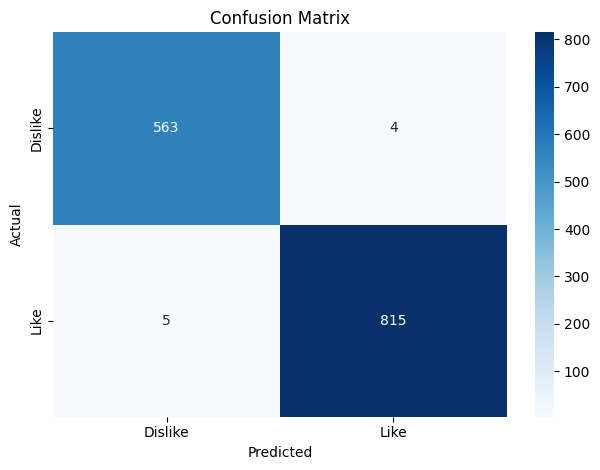

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Dislike', 'Like'],
yticklabels=['Dislike', 'Like'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [16]:
samples = [
"I love The Da Vinci Code...",
"Love luv lubb the Da Vinci Code!"
]
for s in samples:s_lem = ' '.join(to_lemmas(s))
s_vec = vectorizer.transform([s_lem])
pred = model.predict(s_vec)[0]
print(f"'{s}' => {'Liked' if pred == 1 else 'Disliked'}")

'Love luv lubb the Da Vinci Code!' => Liked
